## Alibaba Cluster Trace
### cluster-trace-v2018
https://github.com/alibaba/clusterdata

,cpu,mem
time_stamp,,
1970-01-01 00:55:00,15.0,81.0
1970-01-01 01:00:00,14.0,83.0
1970-01-01 01:05:00,20.0,87.0
1970-01-01 01:10:00,15.0,84.0
1970-01-01 01:15:00,11.0,81.0


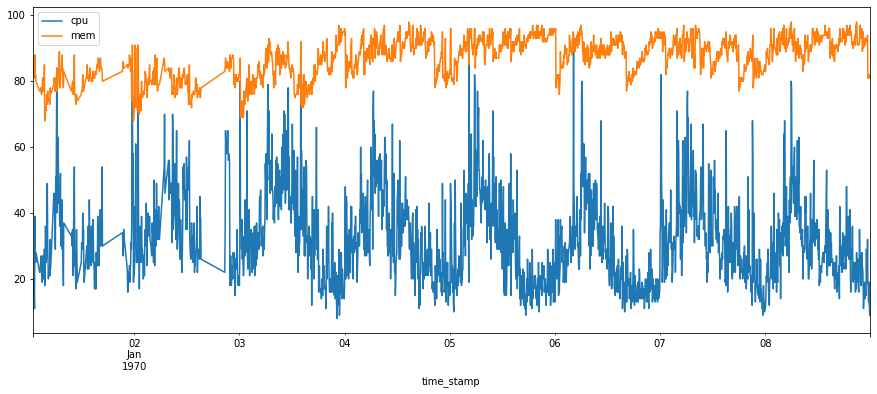

In [2]:
import pandas as pd

df = pd.read_csv('m_1938.csv')
df.columns = ['machine_id', 'time_stamp', 'cpu', 'mem', 'mem_gps', 'mkpi', 'net_in', 'net_out', 'disk_io_percent']
df.time_stamp = pd.to_datetime(df.time_stamp, unit='s')
df.set_index(df.time_stamp, inplace=True)
df = df[['cpu', 'mem']]
df = df.resample('5min').interpolate()
df = df.dropna()
df.plot(figsize=(15, 6))
df.head()

(2, 0) 86.9977551878722
(3, 0) 85.0738850262853
(4, 0) 84.69101933367867
(2, 1) 83.17316232556274
(2, 2) 82.55700340528252
(3, 1) 82.41235612844035
(3, 2) 82.37046978284131
(3, 3) 82.35074758082108


(3, 3)

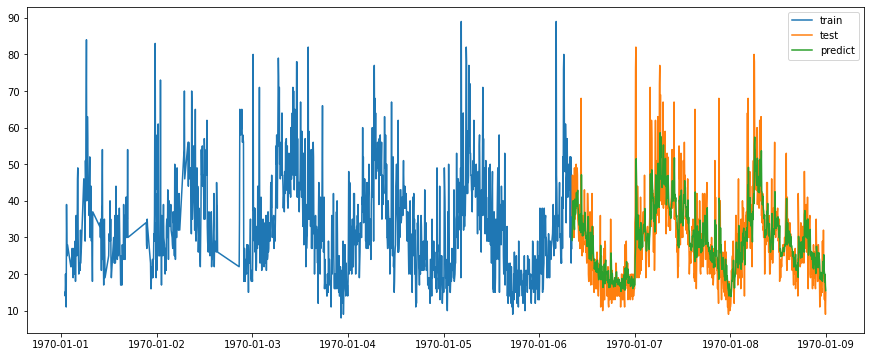

In [3]:
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
    
def best_model(serie, plot=False):
    '''Return the best model for an serie'''
    
    n = len(serie)
    train_size = int(n * 2/3)
    train_set = serie[:train_size]
    test_set = serie[train_size:]

    orders = [(2,0), (3,0), (4,0), (2,1), (2,2), (3,1), (3,2), (3,3)]
    best = 100000
    for order in orders:
        try:
            model = ARMA(train_set, freq='5T', order=order).fit()
            erro = (model.resid ** 2).mean()
            if erro < best:
                best = erro
                print(order, erro)
                best_order = order
        except:
            pass
    if plot:
        
        arma33_train = ARMA(train_set, freq='5T', order=best_order).fit()
        arma33_test = ARMA(test_set, freq='5T', order=best_order).fit(arma33_train.params)
        plt.figure(figsize=(15,6))
        plt.plot(train_set)
        plt.plot(test_set)
        plt.plot(arma33_test.predict())
        plt.legend(['train', 'test', 'predict'])
        
    return best_order
best_model(df.cpu, plot=True)

16.446261145190256

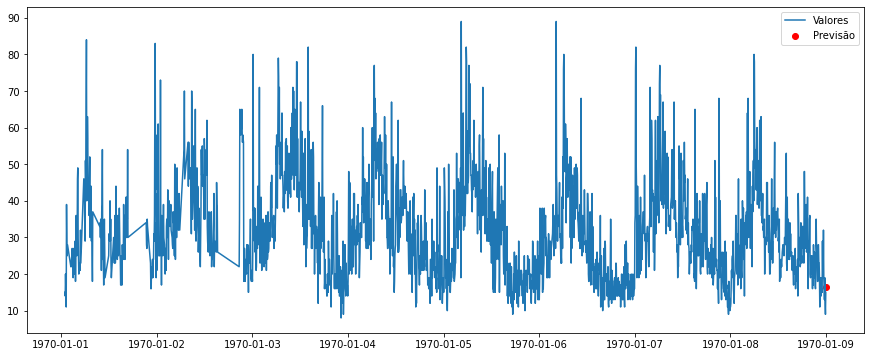

In [5]:
def predict(serie, order, plot=False):
    model = ARMA(serie, freq='5T', order=order).fit()
    forecast = model.forecast()[0][0]
    if plot:
        plt.figure(figsize=(15, 6))
        plt.plot(serie)
        plt.scatter(serie.index[-1], forecast, color='red')
        plt.legend(['Valores', 'Previsão'])
    return forecast
predict(df.cpu, (3, 2), plot=True)